In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
from lassolver.utils.func import *
from lassolver.utils.signal import *
from lassolver.utils.utils import *

from lassolver.matrices.iid_gauss import iidGaussian
from lassolver.matrices.uni_invar import UniInvar

from lassolver.solver.amp import AMP
from lassolver.solver.oamp import OAMP

from lassolver.dsolver.d_amp import D_AMP
from lassolver.dsolver.d_oamp import D_OAMP

# 数値実験の設定

In [3]:
N = 1000
alpha = 0.5
M = int(alpha*N)
rho = 0.2

In [4]:
kappa = 5
P = 50
T = 30

In [5]:
x = bernouli_gaussian(N, rho)
SNR = 60

In [6]:
iidG = iidGaussian(M, N, 0, 1/M)
UniInv = UniInvar(M, N, kappa)

# i.i.d.ガウス行列での信号再構成

In [7]:
tmp_iidG = [AMP(iidG.A, x, SNR), 
        D_AMP(iidG.A, x, SNR, P), 
        OAMP(iidG.A, x, SNR), 
        D_OAMP(iidG.A, x, SNR, P)]

final mse: 0.10394283322967356


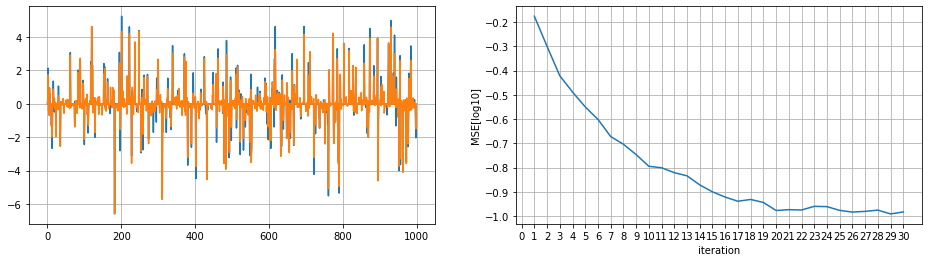

In [8]:
tmp_iidG[0].estimate(T=T)
tmp_iidG[0].result()

In [9]:
print("N(P-1): {}".format(N*(P-1)))
print("")
tmp_iidG[1].estimate(T=T, log=True)

N(P-1): 49000

1/30: tau = 2.403575338641418, v = 1.2011869705871037
Rp: 19989.0 	 F: 417 	 F\Rp: 12183
Total Communication Cost: 32172
2/30: tau = 1.0501881788486933, v = 0.5244933906907409
Rp: 22687.0 	 F: 541 	 F\Rp: 14570
Total Communication Cost: 37257
3/30: tau = 0.8056674236875335, v = 0.4022330131101612
Rp: 20899.0 	 F: 535 	 F\Rp: 15406
Total Communication Cost: 36305
4/30: tau = 0.4682157991631273, v = 0.23350720084795795
Rp: 24164.0 	 F: 571 	 F\Rp: 14579
Total Communication Cost: 38743
5/30: tau = 0.38673524325730446, v = 0.19276692289504654
Rp: 23721.0 	 F: 549 	 F\Rp: 14122
Total Communication Cost: 37843
6/30: tau = 0.29697367259627905, v = 0.14788613756453384
Rp: 24939.0 	 F: 613 	 F\Rp: 15086
Total Communication Cost: 40025
7/30: tau = 0.24452582712448487, v = 0.12166221482863673
Rp: 24049.0 	 F: 588 	 F\Rp: 14881
Total Communication Cost: 38930
8/30: tau = 0.18037257416471242, v = 0.08958558834875052
Rp: 26472.0 	 F: 614 	 F\Rp: 14108
Total Communication Cost: 40580
9

final mse: 0.13115309150441368


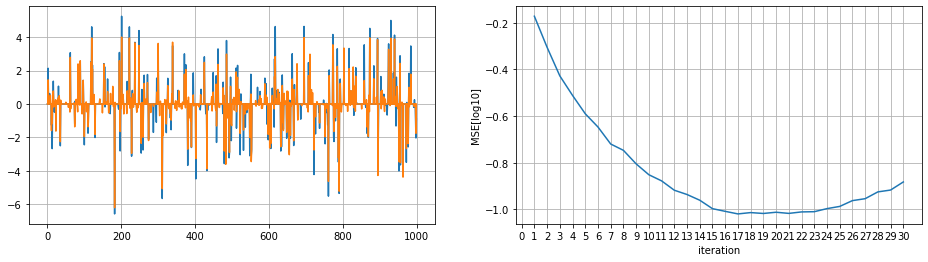

In [10]:
tmp_iidG[1].result()

final mse: 0.012892350129483728


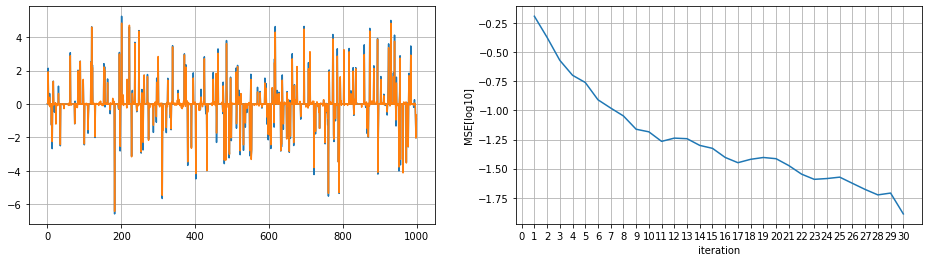

In [11]:
tmp_iidG[2].estimate(T=T)
tmp_iidG[2].result()

In [12]:
print("N(P-1): {}".format(N*(P-1)))
print("")
tmp_iidG[3].estimate(T=T, log=True)

N(P-1): 49000

1/30: tau = 1.2049118367337257, v = 1.2025110540305792
Rp: 33001.0 	 F: 434 	 F\Rp: 7309
Total Communication Cost: 40310
2/30: tau = 0.5689627423962736, v = 0.56656321371592
Rp: 33019.0 	 F: 478 	 F\Rp: 7958
Total Communication Cost: 40977
3/30: tau = 0.4006104951585099, v = 0.39821385093548145
Rp: 33190.0 	 F: 497 	 F\Rp: 8187
Total Communication Cost: 41377
4/30: tau = 0.2519186485660778, v = 0.249525269039506
Rp: 33079.0 	 F: 491 	 F\Rp: 8273
Total Communication Cost: 41352
5/30: tau = 0.1802315820649138, v = 0.17784296534403204
Rp: 32978.0 	 F: 507 	 F\Rp: 8491
Total Communication Cost: 41469
6/30: tau = 0.11908259859563045, v = 0.1167005813947861
Rp: 33192.0 	 F: 506 	 F\Rp: 8287
Total Communication Cost: 41479
7/30: tau = 0.10916189737770161, v = 0.10678455921589461
Rp: 33135.0 	 F: 511 	 F\Rp: 8456
Total Communication Cost: 41591
8/30: tau = 0.09628837793531322, v = 0.09391425057083724
Rp: 33253.0 	 F: 509 	 F\Rp: 8289
Total Communication Cost: 41542
9/30: tau = 0

final mse: 0.002740982941000755


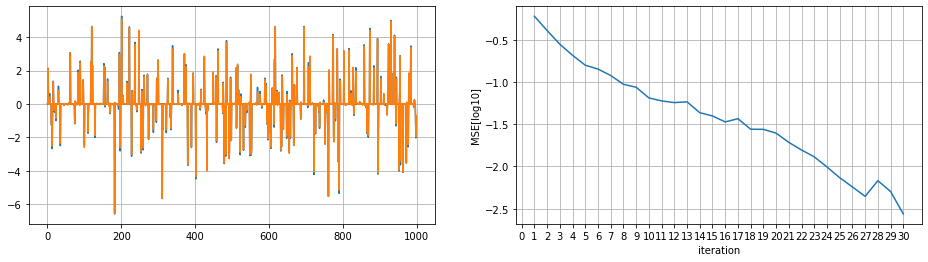

In [13]:
tmp_iidG[3].result()

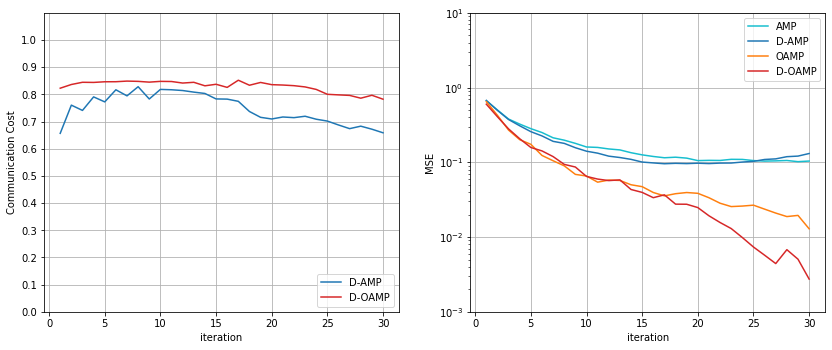

In [14]:
plt.figure(figsize=(14, 5.5))

plt.subplot(121)
plt_CC(tmp_iidG[1].communication_cost, 'D-AMP', T, N, P, 'tab:blue')
plt_CC(tmp_iidG[3].communication_cost, 'D-OAMP', T, N, P, 'tab:red')
plt.grid()

plt.subplot(122)
plt_MSE(tmp_iidG[0].mse, 'AMP', T, 'tab:cyan')
plt_MSE(tmp_iidG[1].mse, 'D-AMP', T, 'tab:blue')
plt_MSE(tmp_iidG[2].mse, 'OAMP', T, 'tab:orange')
plt_MSE(tmp_iidG[3].mse, 'D-OAMP', T, 'tab:red')
plt.grid()

# ユニタリ不変行列での信号再構成

In [15]:
tmp_UniInv = [AMP(UniInv.A, x, SNR), 
              D_AMP(UniInv.A, x, SNR, P), 
              OAMP(UniInv.A, x, SNR), 
              D_OAMP(UniInv.A, x, SNR, P)]

final mse: 1.3400933541607303e+58


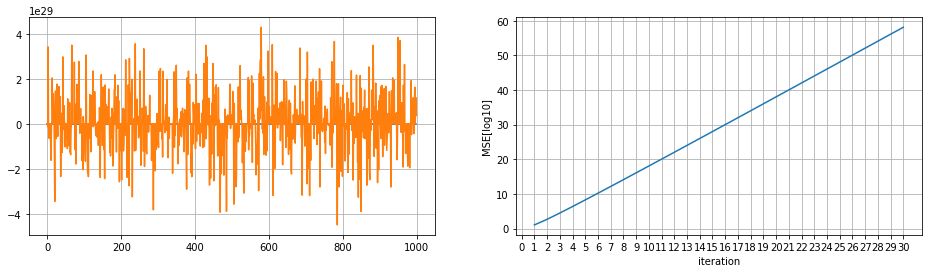

In [16]:
tmp_UniInv[0].estimate(T=T)
tmp_UniInv[0].result()

In [17]:
print("N(P-1): {}".format(N*(P-1)))
print("\n")
tmp_UniInv[1].estimate(T=T, log=True)

N(P-1): 49000


1/30: tau = 2.411610330922506, v = 1.2043499683652055
Rp: 35827.0 	 F: 771 	 F\Rp: 10858
Total Communication Cost: 46685
2/30: tau = 97.62728478978924, v = 48.81218719779857
Rp: 32918.0 	 F: 763 	 F\Rp: 12972
Total Communication Cost: 45890
3/30: tau = 5039.310137266964, v = 2519.6536134363864
Rp: 33460.0 	 F: 751 	 F\Rp: 12326
Total Communication Cost: 45786
4/30: tau = 347914.26782198786, v = 173957.13245579685
Rp: 33735.0 	 F: 742 	 F\Rp: 12024
Total Communication Cost: 45759
5/30: tau = 27261326.179503243, v = 13630663.08829642
Rp: 33906.0 	 F: 755 	 F\Rp: 12135
Total Communication Cost: 46041
6/30: tau = 2283662092.7130785, v = 1141831046.355084
Rp: 33979.0 	 F: 757 	 F\Rp: 12044
Total Communication Cost: 46023
7/30: tau = 199656787240.41974, v = 99828393620.20844
Rp: 34020.0 	 F: 760 	 F\Rp: 12078
Total Communication Cost: 46098
8/30: tau = 18051833710868.15, v = 9025916855434.074
Rp: 34012.0 	 F: 761 	 F\Rp: 12080
Total Communication Cost: 46092
9/30: tau = 16652

final mse: 1.604344475729107e+58


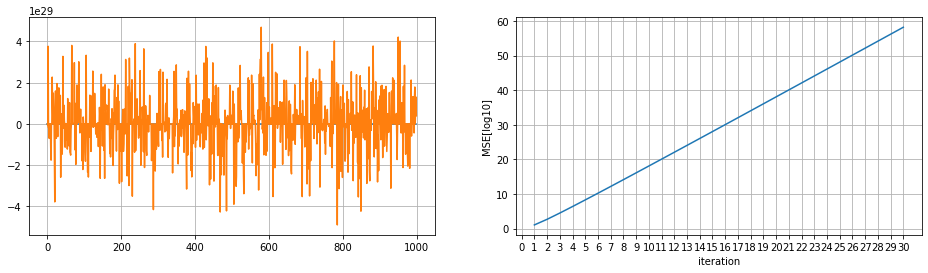

In [18]:
tmp_UniInv[1].result()

final mse: 0.012724403849744305


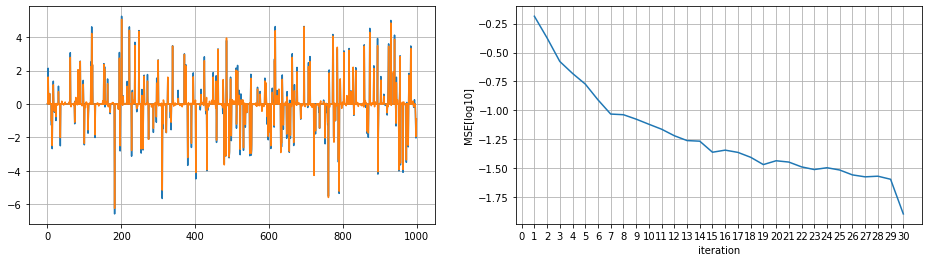

In [19]:
tmp_UniInv[2].estimate(T=T)
tmp_UniInv[2].result()

In [20]:
print("N(P-1): {}".format(N*(P-1)))
print("\n")
tmp_UniInv[3].estimate(T=T, log=True)

N(P-1): 49000


1/30: tau = 1.2085267172675722, v = 1.205848160260294
Rp: 33706.0 	 F: 469 	 F\Rp: 7571
Total Communication Cost: 41277
2/30: tau = 0.6637694660156376, v = 0.661091905745456
Rp: 33779.0 	 F: 434 	 F\Rp: 7020
Total Communication Cost: 40799
3/30: tau = 0.39716897751730856, v = 0.3944938527208599
Rp: 33852.0 	 F: 461 	 F\Rp: 7368
Total Communication Cost: 41220
4/30: tau = 0.24387530658023526, v = 0.2412038657404395
Rp: 33924.0 	 F: 491 	 F\Rp: 7842
Total Communication Cost: 41766
5/30: tau = 0.21594941785961447, v = 0.21328086655193862
Rp: 33764.0 	 F: 510 	 F\Rp: 8112
Total Communication Cost: 41876
6/30: tau = 0.1688618944204727, v = 0.16619620625595122
Rp: 33847.0 	 F: 525 	 F\Rp: 8449
Total Communication Cost: 42296
7/30: tau = 0.14077128409725542, v = 0.1381089851672072
Rp: 33832.0 	 F: 519 	 F\Rp: 8201
Total Communication Cost: 42033
8/30: tau = 0.10898486914126658, v = 0.10632738898376282
Rp: 33894.0 	 F: 478 	 F\Rp: 7473
Total Communication Cost: 41367
9/30: tau 

final mse: 0.006555302374002801


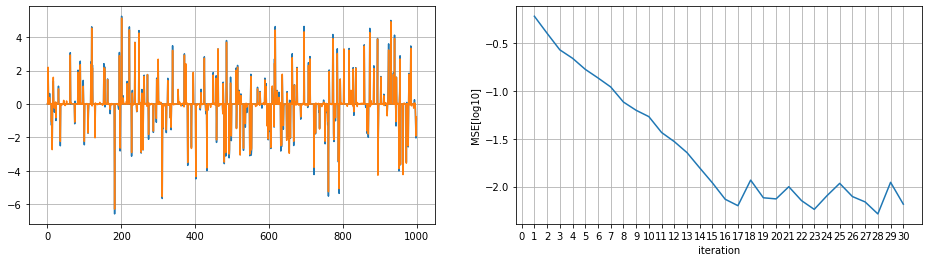

In [21]:
tmp_UniInv[3].result()

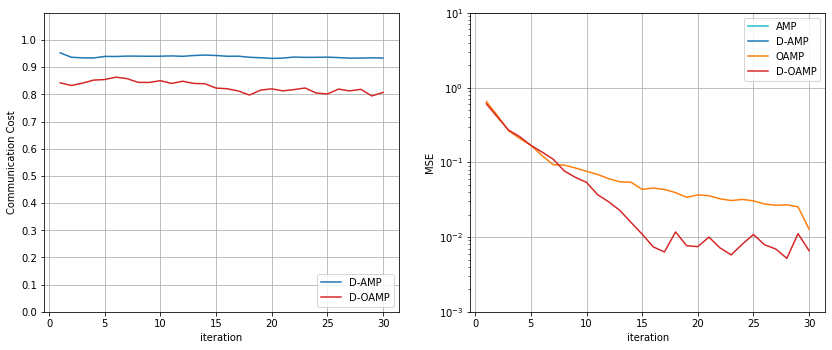

In [22]:
plt.figure(figsize=(14, 5.5))

plt.subplot(121)
plt_CC(tmp_UniInv[1].communication_cost, 'D-AMP', T, N, P, 'tab:blue')
plt_CC(tmp_UniInv[3].communication_cost, 'D-OAMP', T, N, P, 'tab:red')
plt.grid()

plt.subplot(122)
plt_MSE(tmp_UniInv[0].mse, 'AMP', T, 'tab:cyan')
plt_MSE(tmp_UniInv[1].mse, 'D-AMP', T, 'tab:blue')
plt_MSE(tmp_UniInv[2].mse, 'OAMP', T, 'tab:orange')
plt_MSE(tmp_UniInv[3].mse, 'D-OAMP', T, 'tab:red')
plt.grid()